# Studying Populations

This notebook is a sandbox for exploring in a rough way how different algorithms can find different types of clusters.

The problem is that of 


## What do we want to study?

Suppose we have two populations $A$ and $B$ with totally different features. The two populations are related by means of a Function $\cal{F}$ which maps $A_{i}$ to $\{B_j ... B_k \}$. So $\cal{F}$ takes an element of $A$ and returns a subset of $B$.

We can model $\cal{F}$ with a graph directed graph in which the edges always go from an element of $A$ to an element of $B$. To facilitate our problem description, that is what we will do. 

We can visualize the relations of $A$ and $B$ thru $\cal{F}$ in the cell below. 

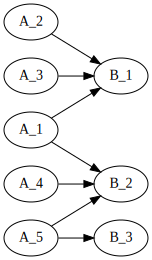

In [28]:
import graphviz
F= graphviz.Digraph()#(engine='neato')
F.graph_attr['rankdir'] = 'LR'
F.edge('A_1','B_1')
F.edge('A_1','B_2')
F.edge('A_2','B_1')
F.edge('A_3','B_1')
F.edge('A_4','B_2')
F.edge('A_5','B_2')
F.edge('A_5','B_3')
F

We want to find a few things:

* Easily visible clusters in A and B 
* Given clusters in A and B, get the Arity of each cluster given $\cal{F}$.



# Testing different user models, spec models and purchasing functions

In [29]:
import numpy as np
import json
from helpers import makePopulation, generatePurchaseData
from populationModels import pop_crude
from sklearn.cluster import AgglomerativeClustering

## Configuring crude population clusters

In [30]:
with open("population_config.json","r") as configfilex:
    cs=json.load(configfilex)

In [31]:
population=makePopulation(100,["something","age","postcode"],
                          pop_crude,
                          c1=cs["c1"],
                          c2=cs["c2"],
                          c3=cs["c3"])

In [32]:
print (population.keys())
n_clusters=len(set(population["cluster_label"]))
print (n_clusters)

dict_keys(['something', 'age', 'postcode', 'cluster_label'])
3


## Agglomerative Clustering

Borrowing example from: http://scikit-learn.org/stable/auto_examples/cluster/plot_digits_linkage.html#sphx-glr-auto-examples-cluster-plot-digits-linkage-py

In [33]:
fittable=np.array([population["something"],
                   population["postcode"],
                   population["age"]]).T
alg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
alg.fit(fittable)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x0000000004E7DA60>)

In [34]:
clusterlabels=list(zip(alg.labels_,population["cluster_label"]))
print("Outs:{}".format(clusterlabels))

Outs:[(2, 'c1'), (2, 'c1'), (0, 'c1'), (2, 'c1'), (2, 'c1'), (0, 'c1'), (2, 'c1'), (0, 'c1'), (2, 'c1'), (2, 'c1'), (2, 'c1'), (0, 'c1'), (2, 'c1'), (2, 'c1'), (2, 'c1'), (2, 'c1'), (2, 'c1'), (0, 'c1'), (2, 'c1'), (0, 'c1'), (2, 'c1'), (2, 'c1'), (2, 'c1'), (2, 'c1'), (0, 'c1'), (0, 'c2'), (2, 'c2'), (0, 'c2'), (2, 'c2'), (0, 'c2'), (0, 'c2'), (0, 'c2'), (0, 'c2'), (2, 'c2'), (2, 'c2'), (0, 'c2'), (2, 'c2'), (0, 'c2'), (2, 'c2'), (0, 'c2'), (0, 'c2'), (0, 'c2'), (2, 'c2'), (0, 'c2'), (2, 'c2'), (0, 'c2'), (0, 'c2'), (2, 'c2'), (0, 'c2'), (0, 'c2'), (2, 'c2'), (2, 'c2'), (0, 'c2'), (2, 'c2'), (2, 'c2'), (2, 'c2'), (0, 'c2'), (2, 'c2'), (2, 'c2'), (2, 'c2'), (0, 'c2'), (2, 'c2'), (2, 'c2'), (0, 'c2'), (0, 'c2'), (0, 'c2'), (2, 'c2'), (2, 'c2'), (2, 'c2'), (0, 'c2'), (2, 'c2'), (2, 'c2'), (0, 'c2'), (0, 'c2'), (2, 'c2'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 'c3'), (1, 

In [40]:
#ninja visualizing hamming distance using html 
with open("htmlcolors.json","r") as colorfile:
    colors=json.load(colorfile)
#sample "nclusters" colors from that list, use them for visulaizing
colors=list(colors.keys())
colors=np.random.choice(colors,size=n_clusters)
print(colors)
colormatch={label:colors[indx] for indx,label in enumerate(population["cluster_label"])}

#todo: something like map(lambda x,y: colormatch[x]=y, (alg.labels_,colors))

print (colormatch)
cell="<td bgcolor={}>{}</td>"
row="<tr>{}</tr>"

    

table="<!DOCTYPE html><html><body><table>{}</table></body></html>"
#%% HTML
#<iframe width="100%" height "25%" src="outs/clabels.html"></iframe>



SyntaxError: lambda cannot contain assignment (<ipython-input-40-7b788cb8950e>, line 9)

### Try other linkage methods in agglomerative

In [ ]:
linkage_methods=['ward', 'average', 'complete']
aggl=lambda x: AgglomerativeClustering(n_clusters=n_clusters, linkage=x)



In [ ]:
import webcolors